In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso

EDA:

* check for colums and its distribution.
* check for null values
* check for numeric and categorical columns.
* one hot encoding for categorical columns.
* Heatmap for checking correlation.
* box plots

In [269]:
data=pd.read_csv('Housing.csv')

In [270]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [272]:
data.nunique().sort_values()

,0
guestroom,2
basement,2
mainroad,2
hotwaterheating,2
airconditioning,2
prefarea,2
furnishingstatus,3
bathrooms,4
parking,4
stories,4


In [273]:
X=data.drop('price',axis=1)
y=data['price']

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42)

In [275]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((490, 12), (55, 12), (490,), (55,))

In [276]:
train_df = pd.concat([X_train, y_train], axis=1)

In [277]:
train_df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,490.000000,490.000000,490.000000,490.000000,490.000000,4.900000e+02
mean,5148.477551,2.977551,1.285714,1.806122,0.708163,4.791535e+06
std,2173.283313,0.746845,0.499488,0.870538,0.866636,1.833941e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3588.000000,3.000000,1.000000,1.000000,0.000000,3.500000e+06
50%,4540.000000,3.000000,1.000000,2.000000,0.000000,4.392500e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.796000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


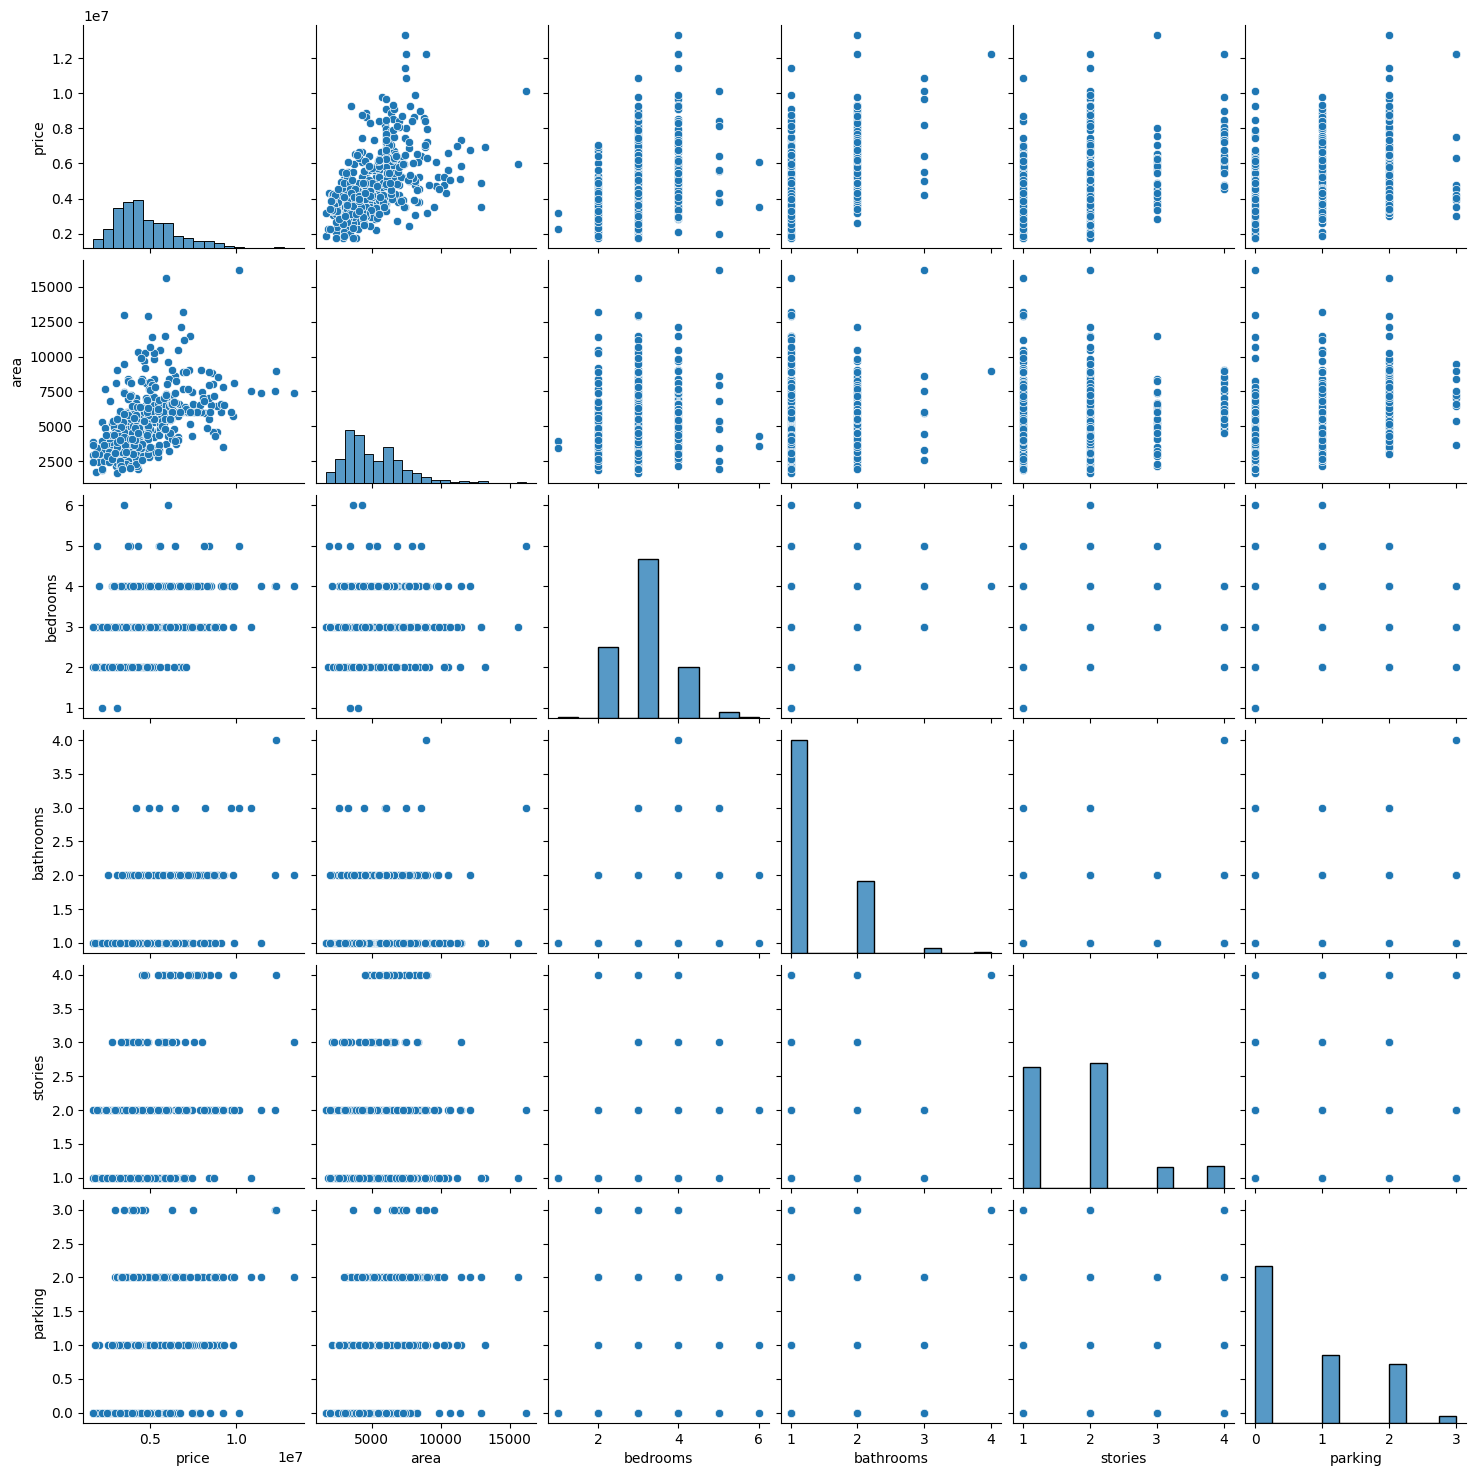

In [278]:
cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']
sns.pairplot(train_df[cols])
plt.show()


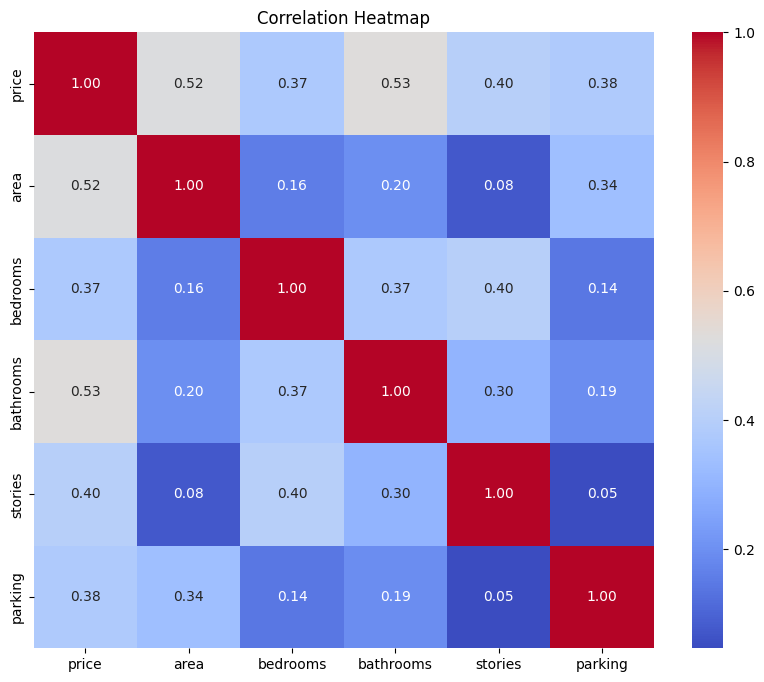

In [279]:
plt.figure(figsize=(10,8))
corr = train_df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

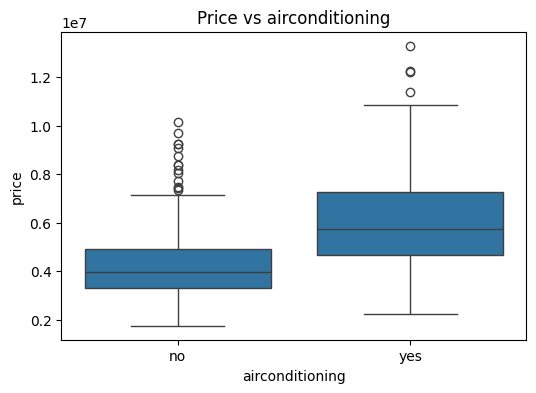

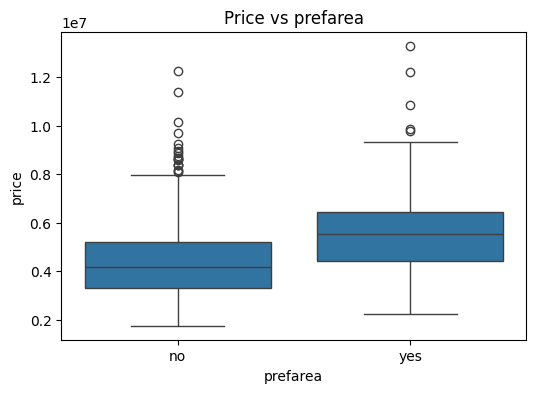

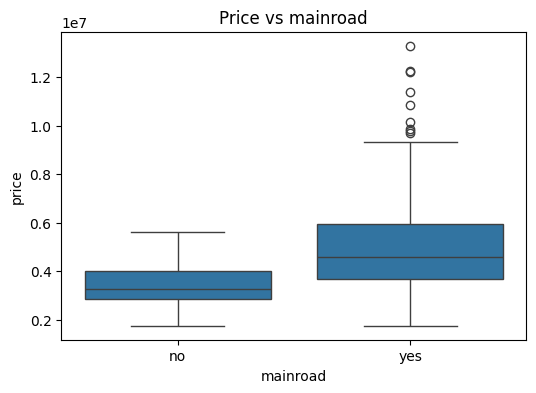

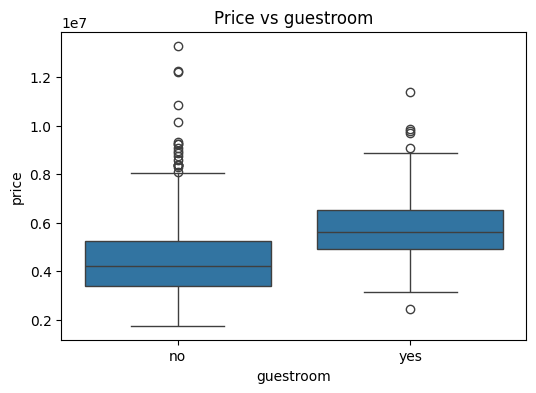

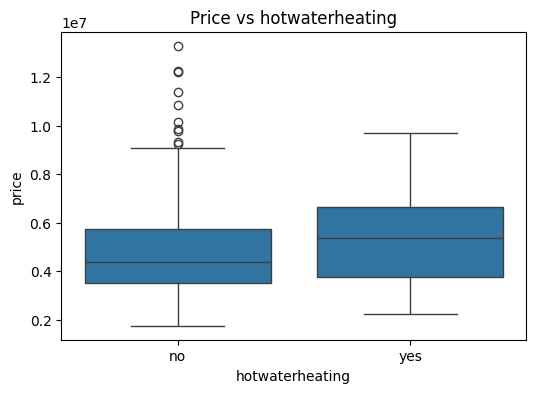

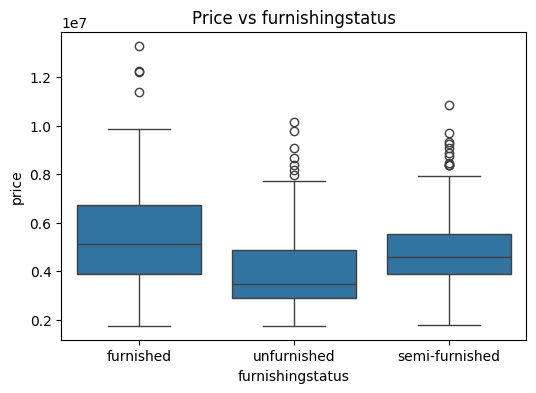

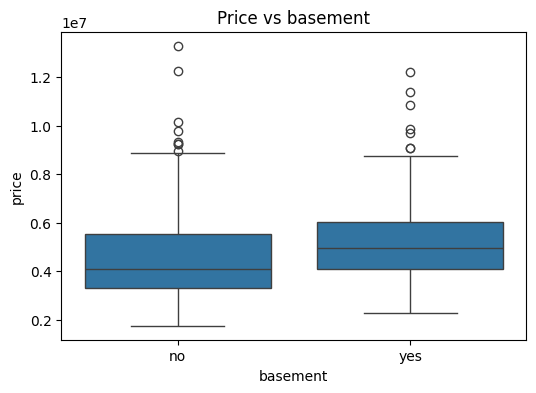

In [280]:
numeric_cols=['area', 'bedrooms', 'bathrooms', 'stories','parking']
categorical_cols = ['airconditioning', 'prefarea', 'mainroad', 'guestroom',
                    'hotwaterheating', 'furnishingstatus','basement']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='price', data=train_df)
    plt.title(f"Price vs {col}")
    plt.show()


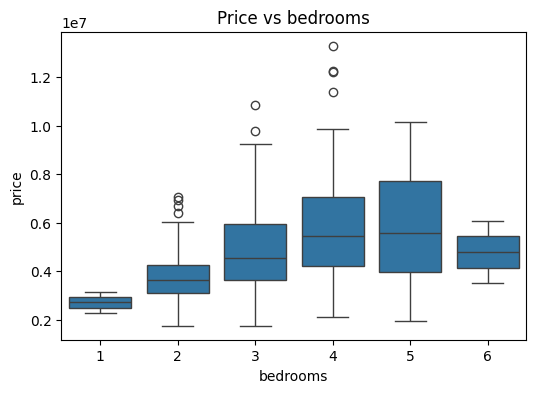

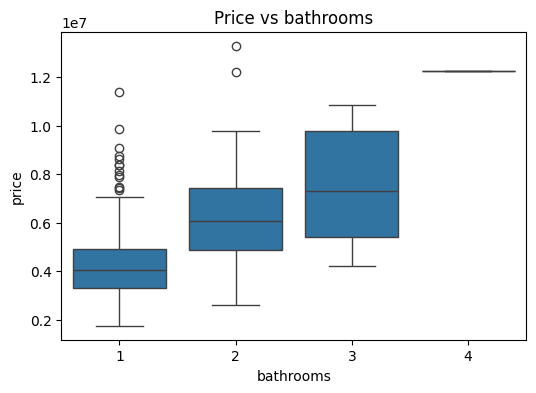

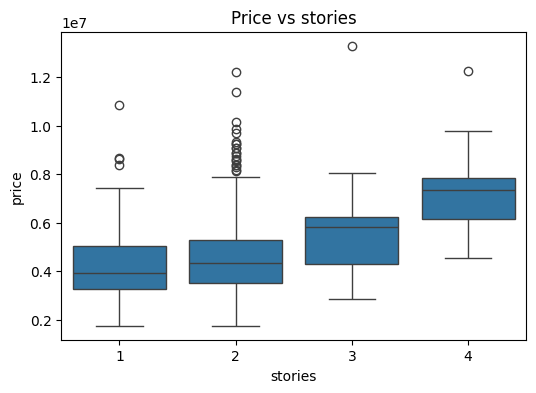

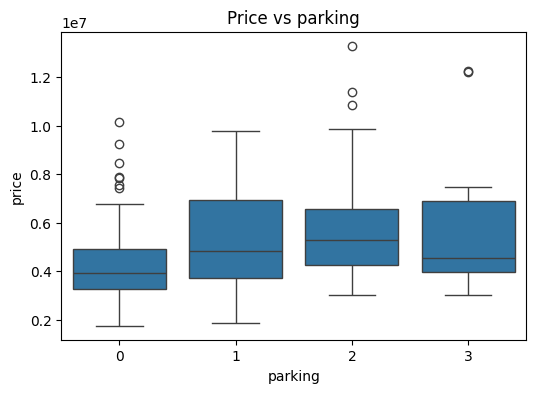

In [281]:
for col in ['bedrooms','bathrooms','stories','parking']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='price', data=train_df)
    plt.title(f"Price vs {col}")
    plt.show()

**Outlier removal**

In [282]:
Q1 = train_df['price'].quantile(0.25)
Q3 = train_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

train_df = train_df[(train_df['price'] >= lower_bound) & (train_df['price'] <= upper_bound)]


In [283]:

X_train = train_df.drop('price', axis=1)
y_train = train_df['price']

**Linear Regression**

In [284]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [285]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

In [286]:
from sklearn import linear_model

def linear_regression(X_train, y_train, X_test, y_test):
    # 1. Define and Fit the pipeline
    linear_model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    linear_model_pipeline.fit(X_train, y_train)

    # 2. Extract internal logic (Fixed variable names here)
    ohe_transformer = linear_model_pipeline.named_steps['preprocessor'].named_transformers_['cat']
    ohe_feature_names = ohe_transformer.get_feature_names_out(categorical_cols)

    all_feature_names = np.concatenate([numeric_cols, ohe_feature_names])

    # Extracting from the 'model' step of THIS specific pipeline
    coefficients = linear_model_pipeline.named_steps['model'].coef_
    intercept = linear_model_pipeline.named_steps['model'].intercept_

    # 3. Create Summary
    model_summary = pd.DataFrame({
        'Feature': all_feature_names,
        'Coefficient': coefficients
    })

    print(f"Model Intercept (Base Price): {intercept:.2f}")
    print(model_summary.sort_values(by='Coefficient', ascending=False))

    # 4. Predictions and Scoring
    y_pred_train = linear_model_pipeline.predict(X_train)
    y_pred_test = linear_model_pipeline.predict(X_test)

    print("\n_________Train score_____")
    print(f"R2 Score: {r2_score(y_train, y_pred_train):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")

    print("\n_____Test Score________")
    print(f"R2 Score: {r2_score(y_test, y_pred_test):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")




In [287]:
linear_regression(X_train,y_train,X_test,y_test)

Model Intercept (Base Price): 3827905.19
                            Feature    Coefficient
9               hotwaterheating_yes  828372.139454
5               airconditioning_yes  735727.274572
6                      prefarea_yes  489980.820452
7                      mainroad_yes  475861.464392
0                              area  447071.156354
2                         bathrooms  420002.205966
3                           stories  385075.343867
8                     guestroom_yes  373823.528618
12                     basement_yes  364775.347198
4                           parking  161791.980849
1                          bedrooms   54593.992271
10  furnishingstatus_semi-furnished  -30250.504879
11     furnishingstatus_unfurnished -402058.905125

_________Train score_____
R2 Score: 0.6620
RMSE: 937924.01
MAE: 700843.92

_____Test Score________
R2 Score: 0.6724
RMSE: 1233840.10
MAE: 891689.03


**Reidge Regression with different Alpha**

In [288]:
ridge_results=[]
alphas=[0.01,0.1,1,10,100]

In [289]:
def ridge_regression(X_train,y_train,X_test,y_test):

  for alpha in alphas:
    pipeline=Pipeline([
        ('preprocessor',preprocessor),
        ('model',Ridge(alpha=alpha))
    ])

    pipeline.fit(X_train,y_train)
    print(f"_____________________________________Alpha={alpha}________________________________________")

    ohe_transformer =pipeline.named_steps['preprocessor'].named_transformers_['cat']
    ohe_feature_names = ohe_transformer.get_feature_names_out(categorical_cols)

    all_feature_names = np.concatenate([numeric_cols, ohe_feature_names])

    coefficients = pipeline.named_steps['model'].coef_
    intercept = pipeline.named_steps['model'].intercept_

    model_summary = pd.DataFrame({
        'Feature': all_feature_names,
        'Coefficient': coefficients
    })

    print(f"Model Intercept (Base Price): {intercept:.2f}")
    print(model_summary.sort_values(by='Coefficient', ascending=False))


    y_train_pred=pipeline.predict(X_train)
    y_test_pred=pipeline.predict(X_test)

    train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
    train_r2=r2_score(y_train,y_train_pred)
    test_r2=r2_score(y_test,y_test_pred)
    train_mae=mean_absolute_error(y_train,y_train_pred)
    test_mae=mean_absolute_error(y_test,y_test_pred)
    ridge_results.append((alpha,train_rmse,test_rmse,train_r2,test_r2,train_mae,test_mae))


In [290]:
ridge_regression(X_train,y_train,X_test,y_test)

_____________________________________Alpha=0.01________________________________________
Model Intercept (Base Price): 3828008.94
                            Feature    Coefficient
9               hotwaterheating_yes  827969.909135
5               airconditioning_yes  735632.673509
6                      prefarea_yes  489929.664936
7                      mainroad_yes  475795.478157
0                              area  447080.349698
2                         bathrooms  420002.616180
3                           stories  385081.028482
8                     guestroom_yes  373796.290932
12                     basement_yes  364769.356441
4                           parking  161805.155279
1                          bedrooms   54600.605010
10  furnishingstatus_semi-furnished  -30227.410169
11     furnishingstatus_unfurnished -402026.905988
_____________________________________Alpha=0.1________________________________________
Model Intercept (Base Price): 3828940.27
                            F

In [291]:


ridge_df = pd.DataFrame(
    ridge_results,
    columns=['alpha', 'train_rmse', 'test_rmse','train_r2','test_r2','train_mae','test_mae']
)
print(ridge_df)


    alpha     train_rmse     test_rmse  train_r2   test_r2      train_mae  \
0    0.01  937924.010801  1.233849e+06  0.662030  0.672345  700837.371390   
1    0.10  937924.530636  1.233930e+06  0.662029  0.672303  700778.661538   
2    1.00  937973.154120  1.234737e+06  0.661994  0.671874  700251.326612   
3   10.00  940833.358157  1.242911e+06  0.659930  0.667515  697653.784328   
4  100.00  986897.541184  1.322564e+06  0.625814  0.623534  730285.544736   

        test_mae  
0  891699.402007  
1  891792.410385  
2  892761.613078  
3  901866.602340  
4  984328.752744  


**Lasso Regression:**

In [292]:
alphas=[0.01,0.1,1,10,100]

In [293]:
lasso_results=[]

In [294]:
def Lasso_regression(X_train_scaled,y_train,X_test_scaled,y_test):
  for alpha in alphas:
    pipeline=Pipeline([
        ('preprocessor',preprocessor),
        ('model',Lasso(alpha=alpha,max_iter=10000))
    ])

    pipeline.fit(X_train,y_train)


    ohe_transformer =pipeline.named_steps['preprocessor'].named_transformers_['cat']
    ohe_feature_names = ohe_transformer.get_feature_names_out(categorical_cols)

    all_feature_names = np.concatenate([numeric_cols, ohe_feature_names])

    coefficients = pipeline.named_steps['model'].coef_
    intercept = pipeline.named_steps['model'].intercept_
    print(f"_____________________________________Alpha={alpha}________________________________________")

    model_summary = pd.DataFrame({
        'Feature': all_feature_names,
        'Coefficient': coefficients
    })

    print(f"Model Intercept (Base Price): {intercept:.2f}")
    print(model_summary.sort_values(by='Coefficient', ascending=False))

    y_train_pred=pipeline.predict(X_train)
    y_test_pred=pipeline.predict(X_test)

    train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
    train_r2=r2_score(y_train,y_train_pred)
    test_r2=r2_score(y_test,y_test_pred)
    train_mae=mean_absolute_error(y_train,y_train_pred)
    test_mae=mean_absolute_error(y_test,y_test_pred)
    lasso_results.append((alpha,train_rmse,test_rmse,train_r2,test_r2,train_mae,test_mae))

In [295]:
Lasso_regression(X_train,y_train,X_test,y_test)

_____________________________________Alpha=0.01________________________________________
Model Intercept (Base Price): 3827905.22
                            Feature    Coefficient
9               hotwaterheating_yes  828371.907831
5               airconditioning_yes  735727.234340
6                      prefarea_yes  489980.782102
7                      mainroad_yes  475861.404260
0                              area  447071.167062
2                         bathrooms  420002.208606
3                           stories  385075.344889
8                     guestroom_yes  373823.487268
12                     basement_yes  364775.332344
4                           parking  161791.983917
1                          bedrooms   54593.988254
10  furnishingstatus_semi-furnished  -30250.411920
11     furnishingstatus_unfurnished -402058.819605
_____________________________________Alpha=0.1________________________________________
Model Intercept (Base Price): 3827905.48
                            F

In [296]:
lasso_df = pd.DataFrame(
    lasso_results,
    columns=['alpha', 'train_rmse', 'test_rmse','train_r2','test_r2','train_mae','test_mae']
)
print(lasso_df)


    alpha     train_rmse     test_rmse  train_r2   test_r2      train_mae  \
0    0.01  937924.005514  1.233840e+06   0.66203  0.672350  700843.913118   
1    0.10  937924.005514  1.233840e+06   0.66203  0.672350  700843.879573   
2    1.00  937924.005546  1.233840e+06   0.66203  0.672350  700843.546856   
3   10.00  937924.008679  1.233841e+06   0.66203  0.672350  700840.211326   
4  100.00  937924.321751  1.233845e+06   0.66203  0.672347  700806.772829   

        test_mae  
0  891689.027594  
1  891689.029616  
2  891689.051024  
3  891689.256603  
4  891691.291956  


# K-Fold Cross Validation in simple linear Regression



In [297]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate

In [298]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',LinearRegression())
])



In [299]:
kfold=KFold(n_splits=4,shuffle=True,random_state=55)

In [300]:

scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

results = cross_validate(
    pipeline,
    X_train,
    y_train,
    cv=kfold,
    scoring=scoring,
    return_train_score=True
)


r2_val = results['test_r2']
rmse_val = np.sqrt(-results['test_mse'])
mae_val = -results['test_mae']

r2_train = results['train_r2']
rmse_train=np.sqrt(-results['train_mse'])
mae_train=-results['train_mae']

print("\n----- train scores____")
print("R² scores:", r2_train)
print("Mean R²:", r2_train.mean())

print("\nRMSE scores:", rmse_train)
print("Mean RMSE:", rmse_train.mean())

print("\nMAE scores:", mae_train)
print("Mean MAE:", mae_train.mean())

print("\n____validation scores___")


print("R² scores:", r2_val)
print("Mean R²:", r2_val.mean())

print("\nRMSE scores:", rmse_val)
print("Mean RMSE:", rmse_val.mean())

print("\nMAE scores:", mae_val)
print("Mean MAE:", mae_val.mean())





----- train scores____
R² scores: [0.66011444 0.66673634 0.68563123 0.65723692]
Mean R²: 0.6674297319930812

RMSE scores: [955792.95104784 918469.25107189 896017.31694092 950402.33929066]
Mean RMSE: 930170.4645878267

MAE scores: [721454.85756382 683842.99468028 682519.4548511  696691.93139978]
Mean MAE: 696127.3096237455

____validation scores___
R² scores: [0.64340509 0.63408338 0.56550544 0.65280035]
Mean R²: 0.6239485634724371

RMSE scores: [ 915013.36749609 1014669.77994781 1088228.75004211  930479.10326754]
Mean RMSE: 987097.7501883896

MAE scores: [673686.85027202 778480.14152307 768544.15579857 738741.26346003]
Mean MAE: 739863.1027634202


In [301]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['airconditioning',
                                                   'prefarea', 'mainroad',
                                                   'guestroom',
                                                   'hotwaterheating',
                                                   'furnishingstatus',
                                                   'basement'])])),
                ('model', LinearRegression())])

The small gap between training and validation metrics indicates low variance and good generalization. However, the moderate R² values suggest that the linear model may have limited capacity, indicating some degree of bias.

**Let's Check on Test Data**

In [302]:

# Predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test


In [303]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
R2=r2_score(y_test,y_pred_test)
MAE=mean_absolute_error(y_test,y_pred_test)

print('RMSE:',RMSE)
print('R2:',R2)
print('MAE:',MAE)

RMSE: 1233840.0963569954
R2: 0.672350067881875
MAE: 891689.0273677673


Text(0.5, 1.0, 'Actual vs Predicted on train data')

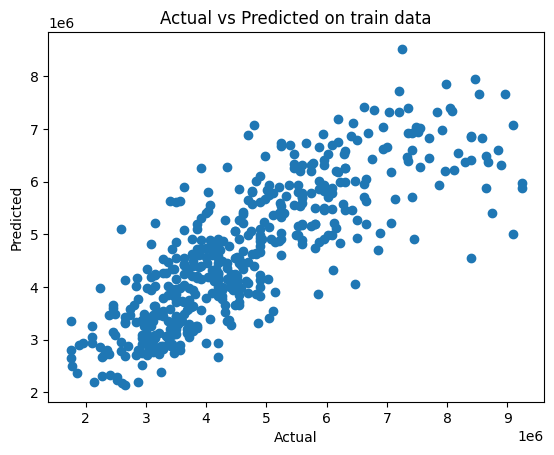

In [304]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted on train data')

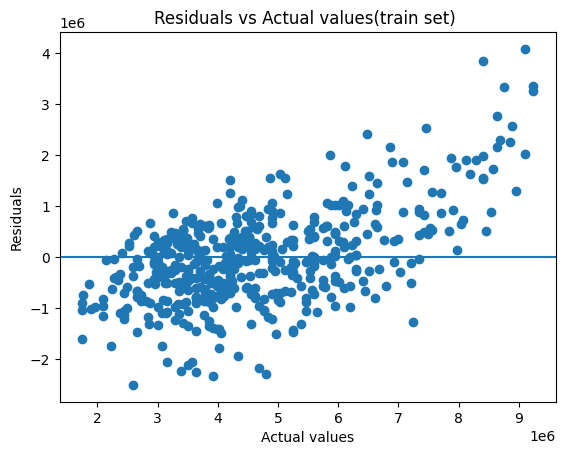

In [305]:
plt.figure()
plt.scatter(y_train, residuals_train)
plt.axhline(0)
plt.xlabel("Actual values")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual values(train set) ")
plt.show()


Residual analysis revealed heteroscedasticity, with prediction errors increasing for higher-priced houses. This violates the constant variance assumption of linear regression.

# **Ridge Regression with K fold cross validation**

In [306]:
alphas= [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

results_ridge=[]

In [307]:
for alpha in alphas:
  pipeline=Pipeline([
      ('preprocessor',preprocessor),
      ('model',Ridge(alpha=alpha))
  ])

  scoring={
      'r2':'r2',
      'mse':'neg_mean_squared_error',
      'mae':'neg_mean_absolute_error'
  }

  res=cross_validate(
      pipeline,
      X_train,
      y_train,
      cv=kfold,
      scoring=scoring,
      return_train_score=True
  )

  r2_val=res['test_r2']
  rmse_val=np.sqrt(-res['test_mse'])
  mae_val=-res['test_mae']

  r2_train=res['train_r2']
  rmse_train=np.sqrt(-res['train_mse'])
  mae_train=-res['train_mae']

  results_ridge.append((alpha,r2_train.mean(),rmse_train.mean(),mae_train.mean(),r2_val.mean(),rmse_val.mean(),mae_val.mean()))


In [308]:
ridge_res_df=pd.DataFrame(
    results_ridge,
    columns=['alpha','train_r2','train_rmse','train_mae','cv_r2','cv_rmse','cv_mae']
)

In [309]:
ridge_res_df

,alpha,train_r2,train_rmse,train_mae,cv_r2,cv_rmse,cv_mae
0,0.01,0.667430,930170.474669,696121.547010,0.623957,9.870865e+05,739848.266654
1,0.05,0.667430,930170.715589,696098.545266,0.623991,9.870416e+05,739789.067355
2,0.10,0.667429,930171.463470,696069.902038,0.624033,9.869863e+05,739715.392849
3,0.50,0.667413,930194.451833,695844.990536,0.624350,9.865696e+05,739142.958616
4,1.00,0.667364,930261.856881,695584.955995,0.624701,9.861091e+05,738515.351060
5,5.00,0.666258,931804.505767,694458.233237,0.626240,9.841043e+05,734997.314581
6,10.00,0.664031,934904.972758,694457.057641,0.626442,9.838795e+05,732427.325101
7,50.00,0.642780,964025.760819,712220.767634,0.614216,1.000035e+06,739124.253129
8,100.00,0.617593,997442.614765,741945.385401,0.593855,1.026126e+06,763624.204998


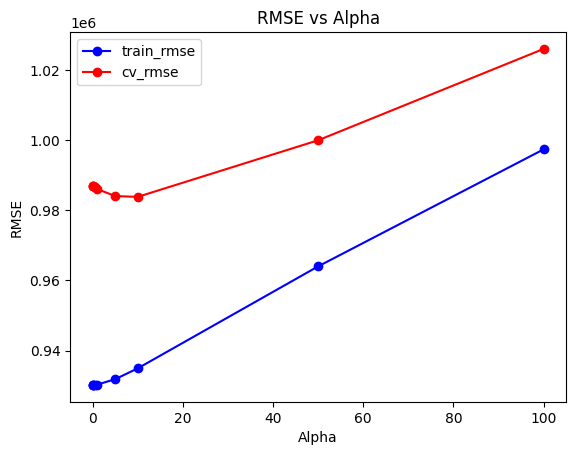

In [310]:
plt.plot(alphas,ridge_res_df['train_rmse'],label='train_rmse',marker='o',color='blue')
plt.plot(alphas,ridge_res_df['cv_rmse'],label='cv_rmse',marker='o',color='red')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.legend()
plt.show()

So According to our graph alpha=10  will goive good results.




In [311]:
Ridge_model=Pipeline([
    ('preprocessor',preprocessor),
    ('model',Ridge(alpha=10))
])

Ridge_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['airconditioning',
                                                   'prefarea', 'mainroad',
                                                   'guestroom',
                                                   'hotwaterheating',
                                                   'furnishingstatus',
                                                   'basement'])])),
                ('model', Ridge(alpha=10))])

In [312]:
Ridge_model.predict(X_test)
Test_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
Test_R2=r2_score(y_test,y_pred_test)
Test_MAE=mean_absolute_error(y_test,y_pred_test)

print('RMSE:',Test_RMSE)
print('R2:',Test_R2)
print('MAE:',Test_MAE)

RMSE: 1233840.0963569954
R2: 0.672350067881875
MAE: 891689.0273677673


# **Lasso Regression with K_fold cross validation**

In [313]:
results_Lasso=[]

In [314]:
for alpha in alphas:
  pipeline=Pipeline([
      ('preprocessor',preprocessor),
      ('model',Lasso(alpha=alpha))
  ])

  scoring={
      'r2':'r2',
      'mse':'neg_mean_squared_error',
      'mae':'neg_mean_absolute_error'
  }

  res=cross_validate(
      pipeline,
      X_train,
      y_train,
      cv=kfold,
      scoring=scoring,
      return_train_score=True
  )

  r2_val=res['test_r2']
  rmse_val=np.sqrt(-res['test_mse'])
  mae_val=-res['test_mae']

  r2_train=res['train_r2']
  rmse_train=np.sqrt(-res['train_mse'])
  mae_train=-res['train_mae']

  results_Lasso.append((alpha,r2_train.mean(),rmse_train.mean(),mae_train.mean(),r2_val.mean(),rmse_val.mean(),mae_val.mean()))


In [315]:
Lasso_res_df=pd.DataFrame(
    results_Lasso,
    columns=['alpha','train_r2','train_rmse','train_mae','cv_r2','cv_rmse','cv_mae']
)

In [316]:
Lasso_res_df

,alpha,train_r2,train_rmse,train_mae,cv_r2,cv_rmse,cv_mae
0,0.01,0.66743,930170.464588,696127.305964,0.623949,987097.747985,739863.098056
1,0.05,0.66743,930170.464588,696127.291407,0.623949,987097.739217,739863.079283
2,0.10,0.66743,930170.464588,696127.273140,0.623949,987097.728113,739863.055788
3,0.50,0.66743,930170.464595,696127.126970,0.623949,987097.640948,739862.868717
4,1.00,0.66743,930170.464617,696126.945269,0.623949,987097.531414,739862.634126
5,5.00,0.66743,930170.465307,696125.492307,0.623949,987096.653345,739860.756441
6,10.00,0.66743,930170.467466,696123.662295,0.623950,987095.557752,739858.416689
7,50.00,0.66743,930170.536492,696109.117960,0.623957,987086.794583,739839.640925
8,100.00,0.66743,930170.751949,696091.137634,0.623966,987075.681004,739815.786273


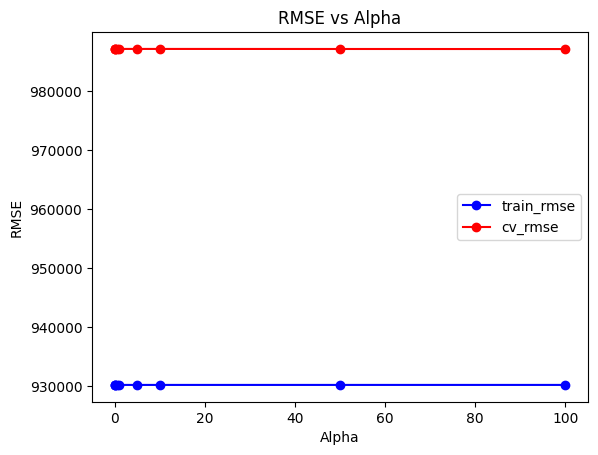

In [317]:
plt.plot(alphas,Lasso_res_df['train_rmse'],label='train_rmse',marker='o',color='blue')
plt.plot(alphas,Lasso_res_df['cv_rmse'],label='cv_rmse',marker='o',color='red')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.legend()
plt.show()

Increasing Alpha does not resduce validation RMSE much.